In [1883]:
import process_data
from process_data import get_dfs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit  
from scipy.special import voigt_profile
from scipy.ndimage import gaussian_filter1d
import os
import importlib
importlib.reload(process_data)

<module 'process_data' from '/Users/xnimir/Desktop/Sn exp 2024/process_data.py'>

In [1884]:
def gaussian(x, A, mu, sigma, B):
    return A * np.exp(-((x - mu)**2) / (2 * sigma**2)) + B

In [1885]:
def standard_lorentzian(x, amplitude, center, width, offset):
    return amplitude * width**2 / ((x - center)**2 + width**2) + offset

In [1886]:
def super_lorentzian(x, amplitude, center, width, power, offset):
    # Generalized Lorentzian with adjustable power for wider wings
    return amplitude * width**power / ((x - center)**power + width**power) + offset

In [1887]:
def modified_voigt(x, amplitude, center, g_width, l_width, offset, modification_factor):
    # Modified Voigt that allows for stronger wings
    basic_voigt = amplitude * voigt_profile(x - center, g_width, l_width)
    wing_enhancement = modification_factor * amplitude * (g_width**2 / ((x - center)**2 + g_width**2))**0.5
    return basic_voigt + wing_enhancement + offset

In [1888]:
def fitting(x,y):
    x_fit = np.linspace(np.min(x), np.max(x), 500)

    initial_guess = [np.max(y), x[np.argmax(y)], np.std(x), 0]
    bounds = ([0, 0, 0, 0], [np.inf, np.max(x), np.inf, np.inf])
    popt, pcov = curve_fit(gaussian, x, y, p0=initial_guess, bounds=bounds, sigma=np.sqrt(y), absolute_sigma=True)
    y_fit = gaussian(x_fit, *popt)
    # print(initial_guess)
    # print(popt)

    return x_fit, y_fit, popt, pcov

In [1889]:
def get_scatter_plot(data_df, time_df, freq_df, file):
    x = data_df['Bin center']
    y = data_df['Count raw']
    y_1 = gaussian_filter1d(data_df['Count raw'], sigma=2)
    # y = data_df['Total_count']
    # y_norm = data_df['Norm count']
    x_fit, y_fit, popt, pcov = fitting(x, y)

    fwhm = 2.355 * popt[2] * 1E6
    fit_errors = np.sqrt(np.diag(pcov))
    mu_error = fit_errors[1]

    plt.figure()
    # plt.errorbar(x, y, yerr=np.sqrt(y), fmt='o', capsize=3)
    plt.scatter(x,y)
    plt.plot(x_fit, y_fit)
    plt.title(f'{file}')
    plt.xlabel('frequency (THz)')
    plt.ylabel('binned counts')

    label = f'mu={popt[1]:.6f} THz\nfwhm={fwhm:.2f} MHz'
    plt.text(0.95, 0.95, label, fontsize=10,
                        verticalalignment='top', horizontalalignment='right',
                        transform=plt.gca().transAxes) 
    plt.show()
    # plt.title('Frequency')
    # plt.scatter(freq_df['Bin center'], freq_df['Count raw'], color='red')
    # plt.show()
    # plt.title('Time')
    # plt.scatter(time_df['Bin center'], time_df['Count raw'])
    # plt.show()

    return popt[1], fwhm

In [1890]:
def main(folder_path):
    for filename, scaled_df, time_df, freq_df in get_dfs(folder_path):
        get_scatter_plot(scaled_df, time_df, freq_df, filename)

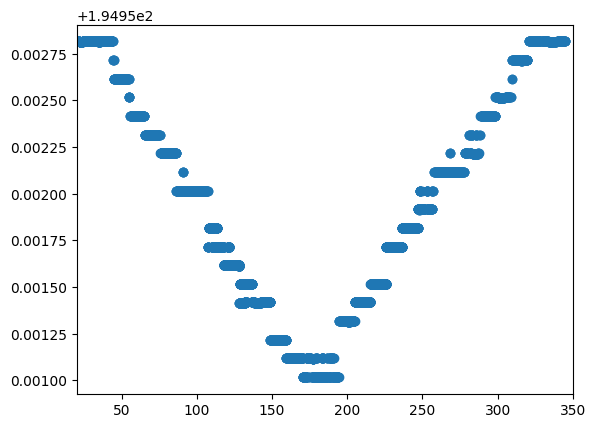

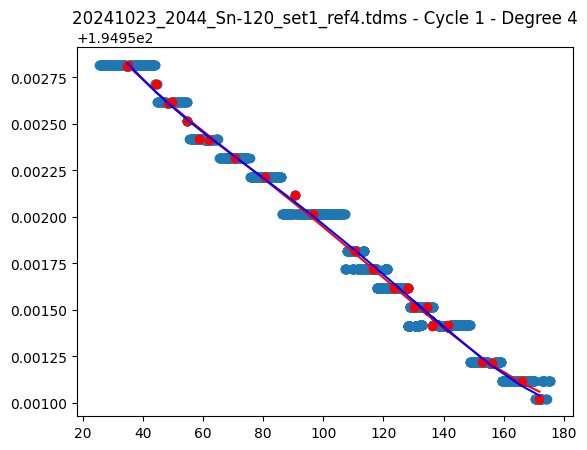

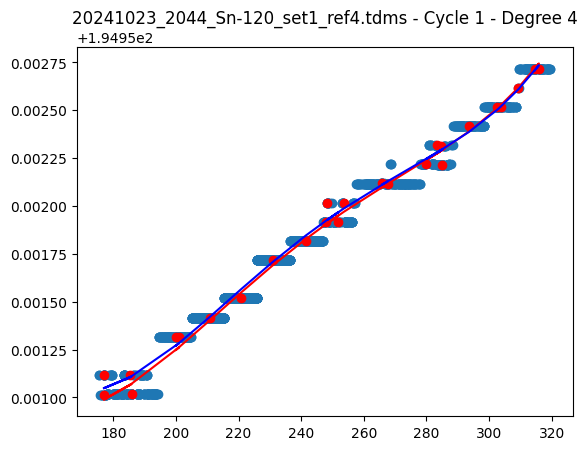

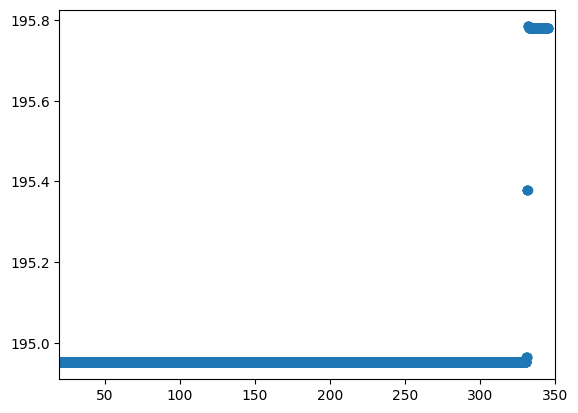

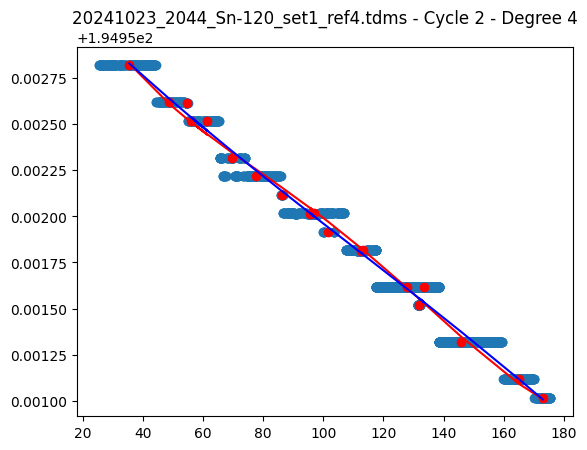

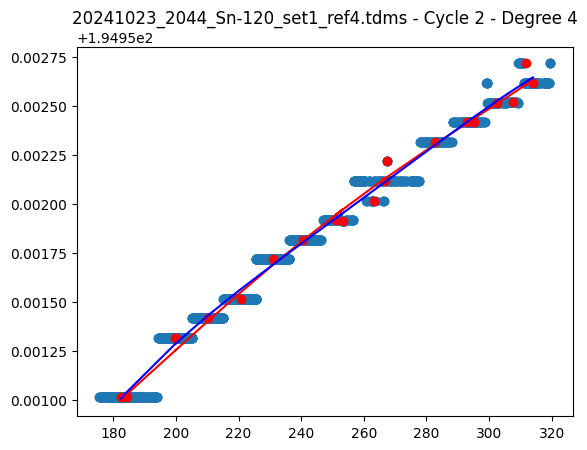

      Cycle No.  Time (sec)  Laser Frequency (THz)   Approx Time  SDUMP  \
0           1.0   25.509411             194.952816  3.812554e+09  0.640   
1           1.0   25.673880             194.952816  3.812554e+09  0.640   
2           1.0   25.673881             194.952816  3.812554e+09  0.640   
3           1.0   25.679224             194.952816  3.812554e+09  0.640   
4           1.0   25.743500             194.952816  3.812554e+09  0.640   
...         ...         ...                    ...           ...    ...   
3831        1.0  175.133480             194.951117  3.812554e+09  0.636   
3832        1.0  175.192237             194.951117  3.812554e+09  0.636   
3833        1.0  175.266935             194.951117  3.812554e+09  0.636   
3834        1.0  175.391608             194.951117  3.812554e+09  0.636   
3835        1.0  175.473640             194.951117  3.812554e+09  0.636   

      LE Probe  nested cycle  scaled_freq  
0     -30000.0             1   194.952973  
1     -3000

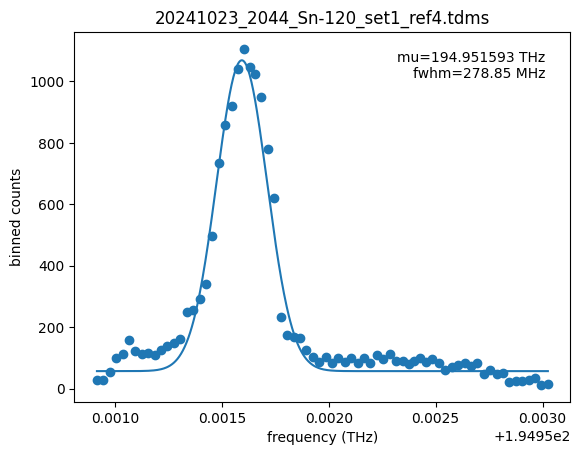

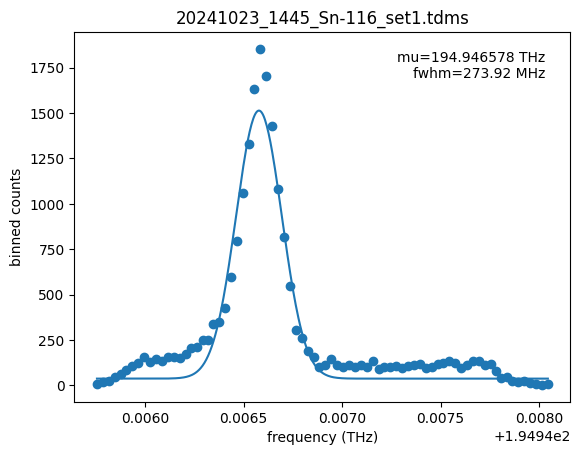

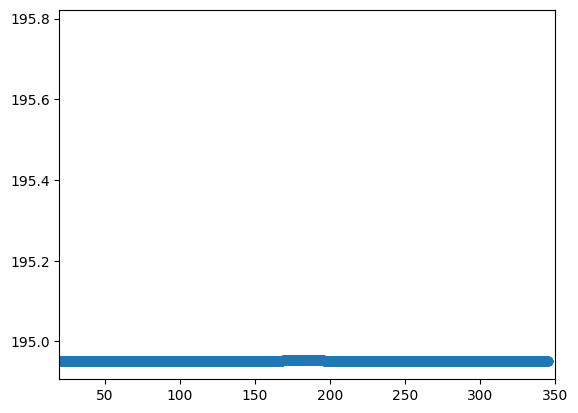

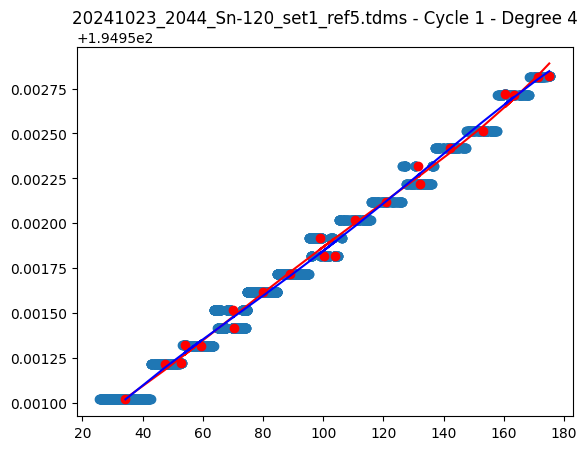

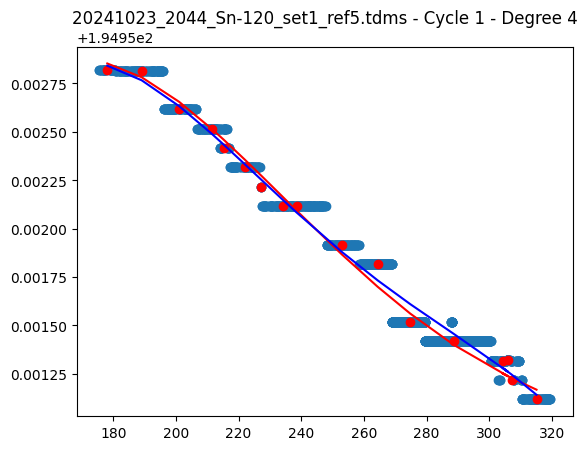

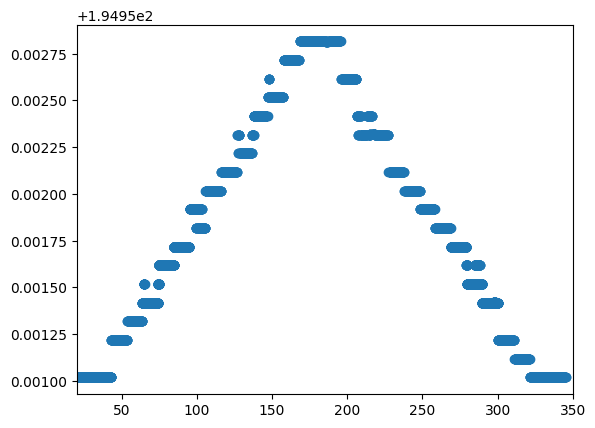

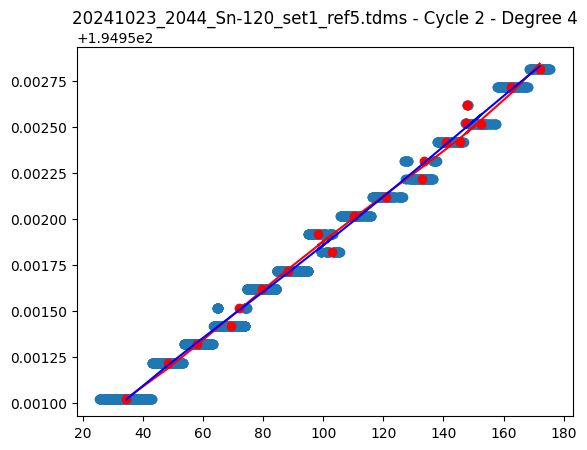

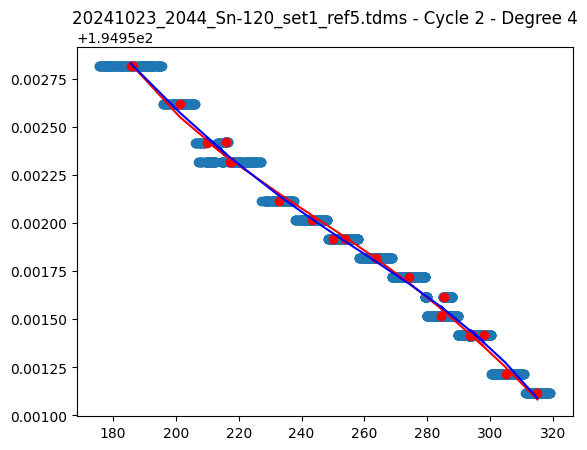

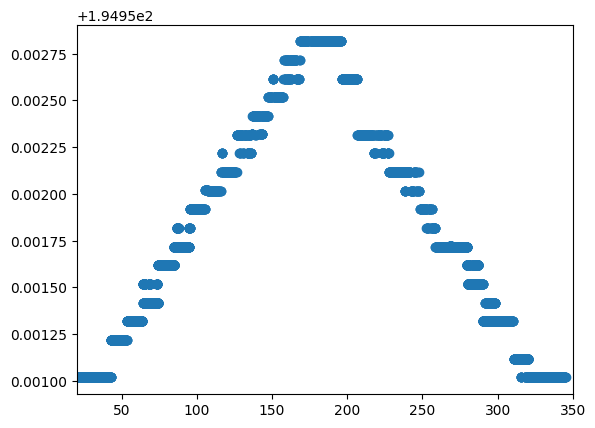

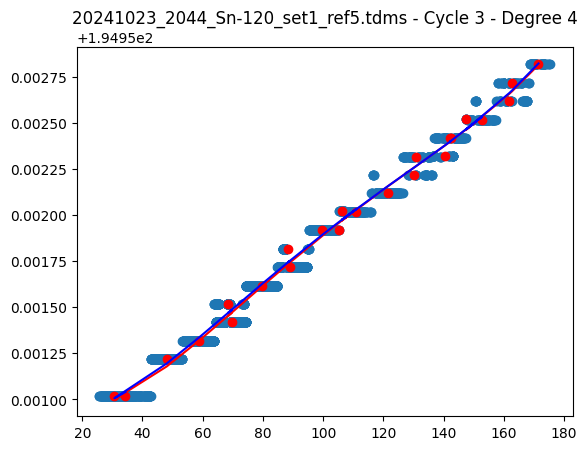

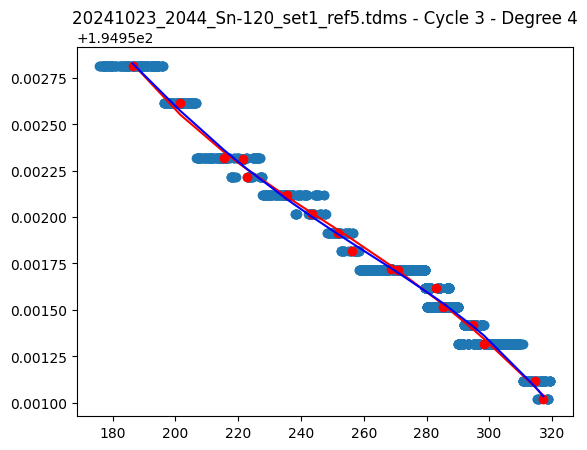

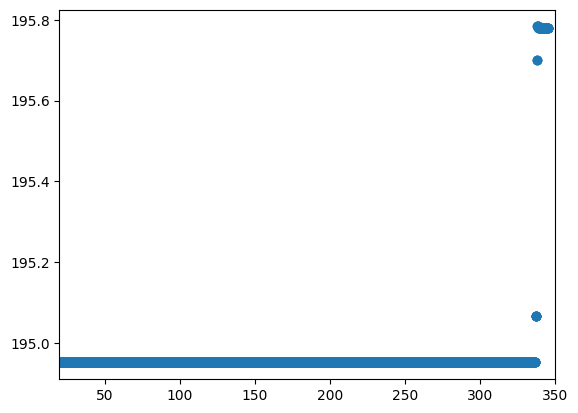

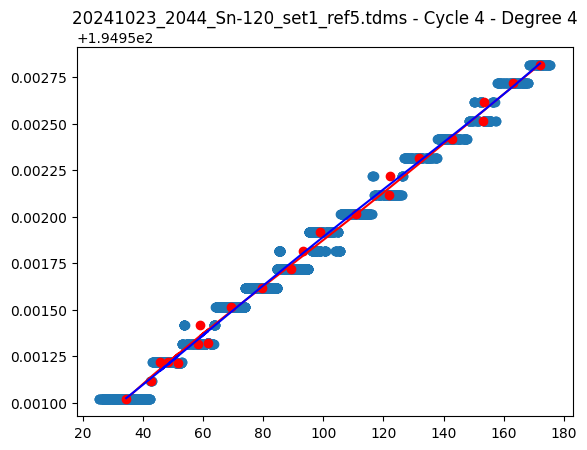

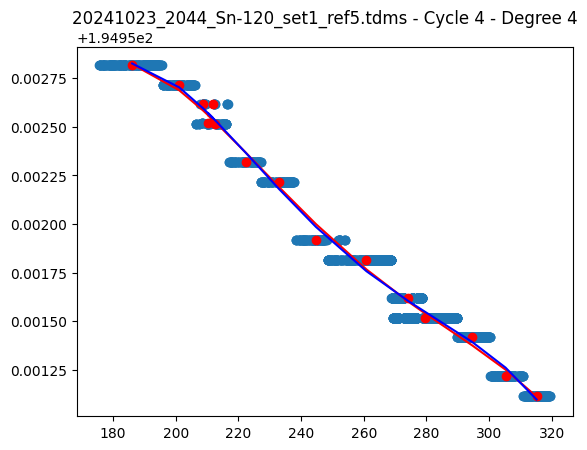

      Cycle No.  Time (sec)  Laser Frequency (THz)   Approx Time  SDUMP  \
0           1.0   25.595208             194.951017  3.812555e+09  0.875   
1           1.0   25.672671             194.951017  3.812555e+09  0.875   
2           1.0   25.764579             194.951017  3.812555e+09  0.875   
3           1.0   25.868606             194.951017  3.812555e+09  0.875   
4           1.0   25.992946             194.951017  3.812555e+09  0.875   
...         ...         ...                    ...           ...    ...   
4512        1.0  175.255095             194.952818  3.812555e+09  0.875   
4513        1.0  175.294527             194.952818  3.812555e+09  0.875   
4514        1.0  175.372748             194.952818  3.812555e+09  0.875   
4515        1.0  175.393033             194.952818  3.812555e+09  0.875   
4516        1.0  175.432302             194.952818  3.812555e+09  0.875   

      LE Probe  nested cycle  scaled_freq  
0     -30000.0             1   194.950927  
1     -3000

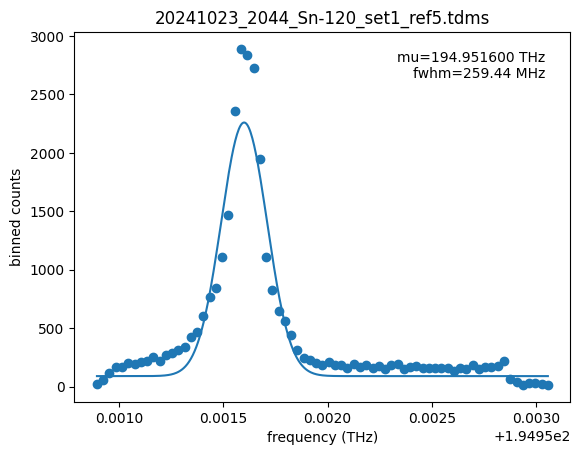

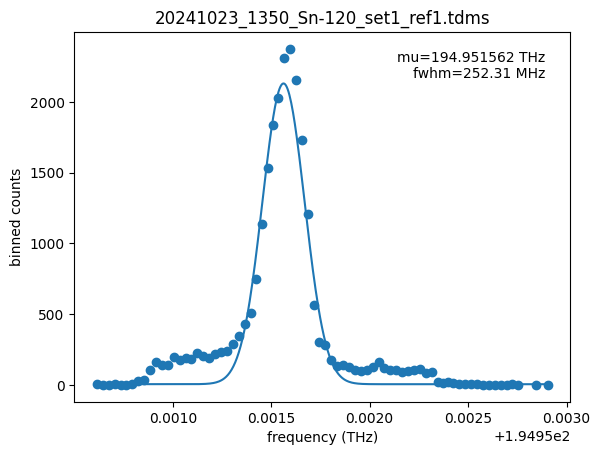

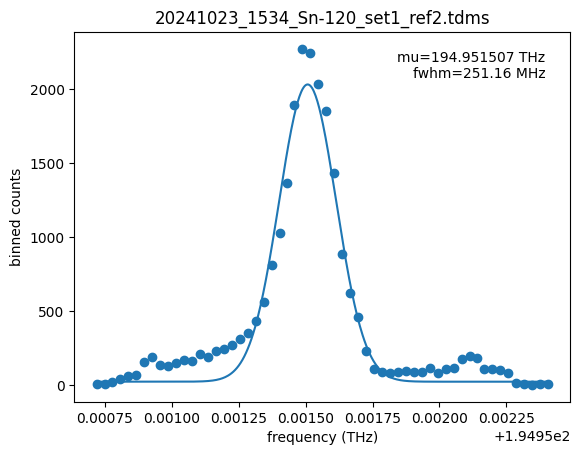

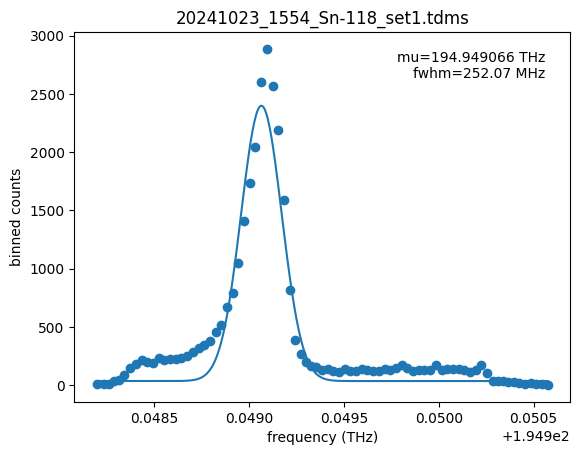

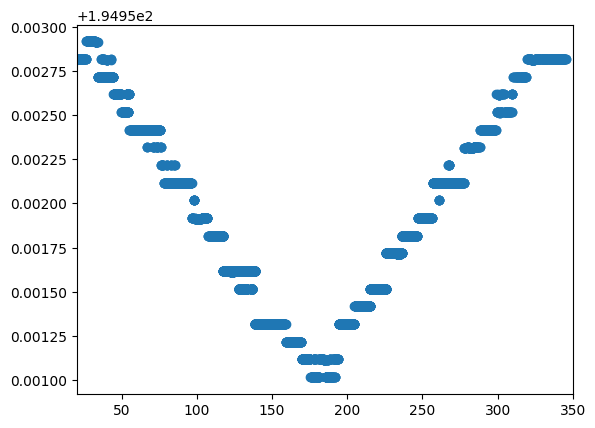

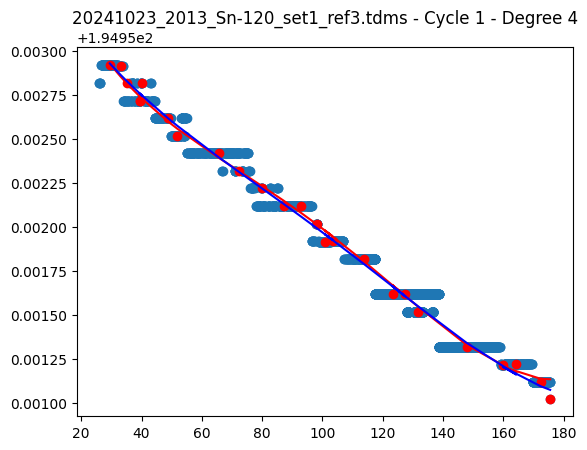

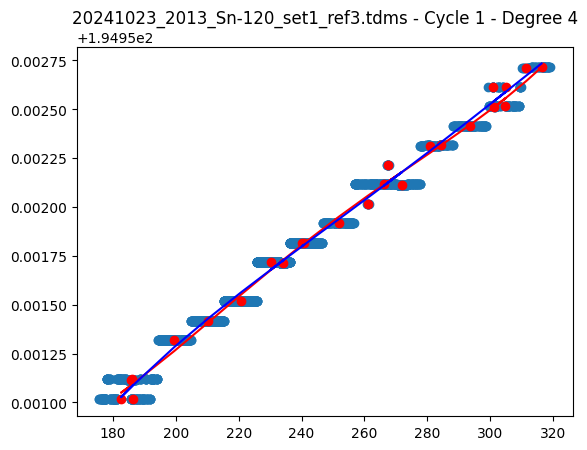

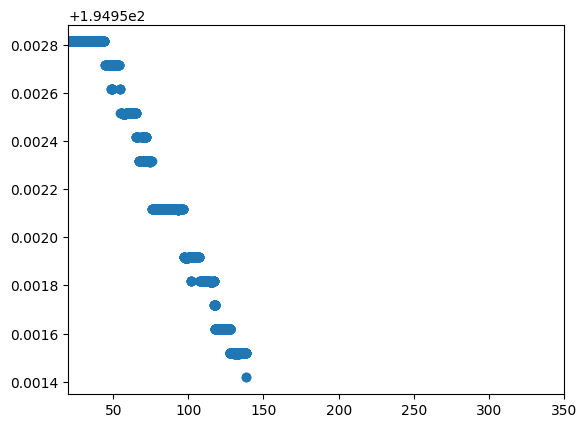

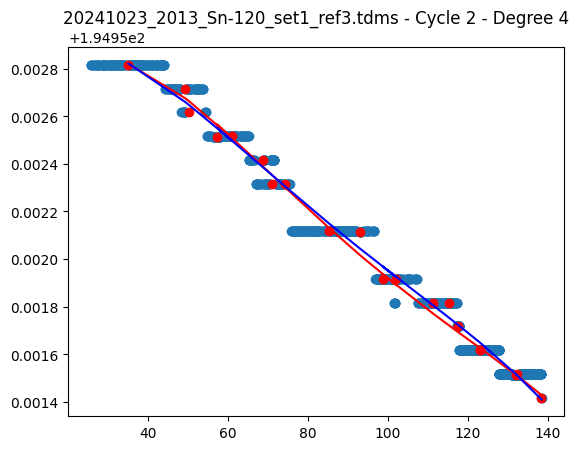

      Cycle No.  Time (sec)  Laser Frequency (THz)   Approx Time  SDUMP  \
0           1.0   25.990479             194.952816  3.812552e+09  1.162   
1           1.0   26.040267             194.952816  3.812552e+09  1.162   
2           1.0   26.182343             194.952816  3.812552e+09  1.162   
3           1.0   26.269000             194.952816  3.812552e+09  1.162   
4           1.0   26.291879             194.952816  3.812552e+09  1.162   
...         ...         ...                    ...           ...    ...   
5655        1.0  175.290690             194.951117  3.812552e+09  1.162   
5656        1.0  175.353356             194.951117  3.812552e+09  1.162   
5657        1.0  175.380003             194.951117  3.812552e+09  1.162   
5658        1.0  175.414197             194.951117  3.812552e+09  1.162   
5659        1.0  175.532952             194.951017  3.812552e+09  1.162   

      LE Probe  nested cycle  scaled_freq  
0     -30000.0             1   194.953002  
1     -3000

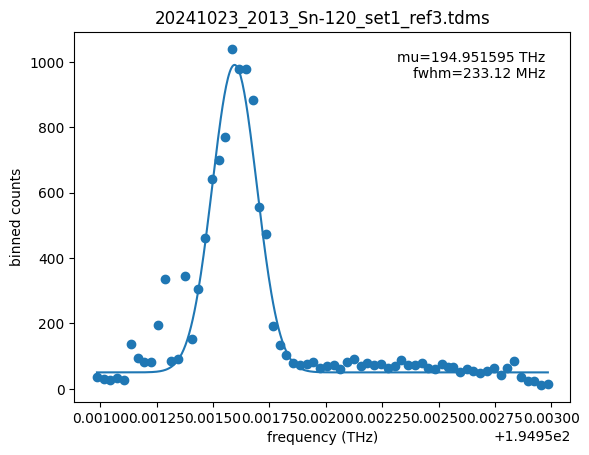

In [1891]:
def single_set():
    folder_path = '/Users/xnimir/Desktop/Sn exp 2024/data/set1/'
    main(folder_path)
single_set()